![Image of Yaktocat](https://www.xoxly.com/wp-content/uploads/2017/12/ogp.png)

## Mercari Price Suggestion Challenge
**Can you automatically suggest product prices to online sellers?**

**It can be hard to know how much something’s really worth**. Small details can mean big differences in pricing. For example, one of these sweaters costs 335usd and other one is 10usd. Can you guess which one’s which?

![Image of Yaktocat](https://storage.googleapis.com/kaggle-media/competitions/mercari/mercari_comparison.png)

**Product pricing gets even harder at scale**, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

***Mercari, Japan’s biggest community-powered shopping app, knows this problem deeply***. They’d like to offer pricing suggestions to sellers, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

In this competition, Mercari’s challenging you to **build an algorithm that automatically suggests the right product prices**. You’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

## Parameters given by Mercari to predict:

1. **Id** : Id of the product
2. **Name**: title of the product
3. **Condition**: condition of the product (0: bad, 5: new)
4. **Category_name**: Category which product belongs to
5. **Brand_name**: Brand which product belongs to
6. **Shipping**: who (buyer/seller) will buy shipping charges
7. **Description**: product description in more detail

## Target 
**Price**: Value of that product

## General Report

**What's the objective behind this challenge**: To create an optimized algorithm which can recommend prices to the users 

**What will be the outcome of the objective** : If the algorithm is good enough, then users will use the application more often which will eventually increase the sales.

**How to classify the problem**: Since we need to predict the prices, so its a Supervised Machine Learning, we'll use different ML algorithms to get the good result.

**How to measure the performance of the problem**: In creation of supervised ML model, generally we use RMSE (Root mean square error) but in this case we'll use RMSLE (Root mean square logarithmic error).

**What other things can affect the model**: Parameters like Geographical location, time, economic conditions can help in predicting the prices more better.

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
train_data = pd.read_csv('dataset/train.tsv', delimiter= '\t')
train_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.000,0,Complete with certificate of authenticity


In [3]:
test_data_1 = pd.read_csv('dataset/test.tsv', delimiter= '\t')
test_data_1.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


Here, in both datasets we can see some **NaN values** which we need to remove

## Exploratory Data Analysis

### Price Distribution

By Analysing Price, we found:

* **Mean**: 26 USD
* **Median**: 17 USD
* **Std**: 38 USD
* **Max price**: 2009 USD
* **Min price**: 0 USD (doesn't make any sense)
* Price distribution is **right skewed** due to this we can see the difference between Mean and Standard deviation.
* Buyer will pay more if he pays for shipping.

In [4]:
train_data.price.describe()

count   1482535.000
mean         26.738
std          38.586
min           0.000
25%          10.000
50%          17.000
75%          29.000
max        2009.000
Name: price, dtype: float64

In [38]:
def plot_histogram(column, range_size, color, bins, title, xlabel, ylabel):
    plt.subplots(figsize=(15,5))
    plt.hist(train_data[(train_data[column] > range_size[0]) & (train_data[column] < range_size[1])]['price'], bins=bins, 
             color= color, edgecolor = 'black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

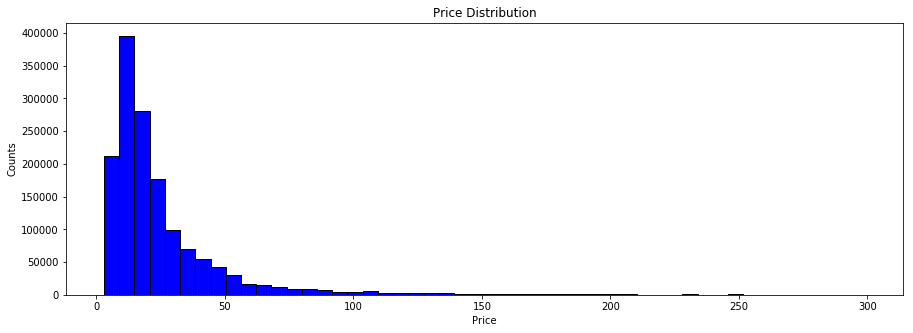

In [39]:
plot_histogram('price', (0,300), 'blue', 50, 'Price Distribution', 'Price', 'Counts')

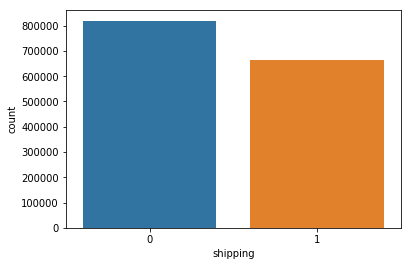

In [34]:
ax = sns.countplot(x="shipping", data=train_data)

By seeing the countplot of shipping we can say proporation of **Seller paying for shipping is little higher**.

In [67]:
def plot_shipping():
    plt.subplots(figsize=(15,5))
    plt.hist(train_data[train_data['shipping'] ==1]['price'], bins=50, color= 'green', edgecolor = 'black', 
             range=[0,300], normed=True, label = 'seller is paying for shipping', alpha = 0.5)
    plt.hist(train_data[train_data['shipping'] ==0]['price'], bins=50, color= 'orange', edgecolor = 'black', 
             range=[0,300], normed=True, label = 'buyer is paying for shipping', alpha = 0.5)
    plt.title('Price Distribution With/Without Shipping', fontsize=15)
    plt.xlabel('Price')
    plt.ylabel('Normalized Samples')
    plt.legend()

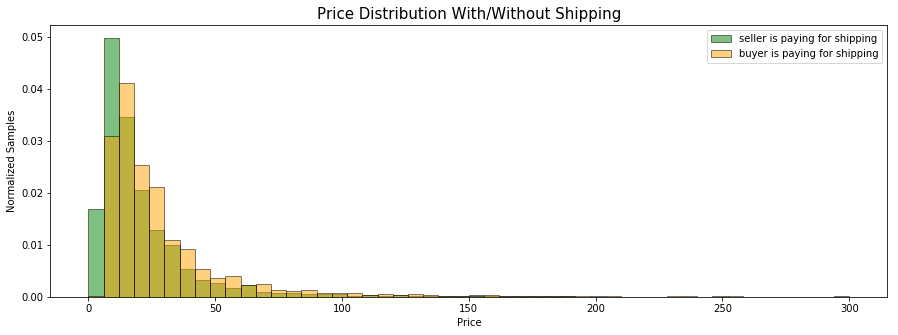

In [68]:
plot_shipping()

In [69]:
train_data['price'].median()

17.0

As we imagined that if **buyer pays for shipping then mean price will be high**

### Brand Analysis

In [82]:
train_data['brand_name'].value_counts()

PINK                   54088
Nike                   54043
Victoria's Secret      48036
LuLaRoe                31024
Apple                  17322
FOREVER 21             15186
Nintendo               15007
Lululemon              14558
Michael Kors           13928
American Eagle         13254
Rae Dunn               12305
Sephora                12172
Coach                  10463
Disney                 10360
Bath & Body Works      10354
Adidas                 10202
Funko                   9237
Under Armour            8461
Sony                    7994
Old Navy                7567
Hollister               6948
Carter's                6385
Urban Decay             6210
The North Face          6172
Independent             5902
Too Faced               5794
Xbox                    5709
Brandy Melville         5680
Kate Spade              5411
MAC                     5302
Kendra Scott            5097
Gap                     5088
Tarte                   4984
UGG Australia           4676
VANS          

Since we have close to **4800 brand names** , lets checkout **top 50 brands**